In [1]:
from matplotlib.cm import get_cmap
from matplotlib import pyplot as plt
import networkx as nx
import numpy as np
import os 
import pickle


#For saving results
data_dir = os.path.join((os.path.dirname(os.getcwd())), 'Data')

#random seed
SEED = 0

#For plotting
name = "Accent_r"

cmap = get_cmap(name) 
colors = cmap.colors  

In [2]:
file_path = os.path.join(data_dir, 'toy_dataset.pkl')
with open(file_path, 'rb') as f:
    g = pickle.load(f)
    
#initialize single position for all visualizations    
pos = nx.spring_layout(g, seed=SEED)

### Louvain's Algorithm

In [3]:
from community import community_louvain

partition_true = g.graph['partition']
partition_true = {node:i for i, cluster in enumerate(partition_true) for node in cluster} 
partition_predicted = community_louvain.best_partition(g, random_state=SEED)

In [26]:
from Main_Code_Repo.Plotting import graph_cluster_plot
graph_cluster_plot(g)

**Visual Analysis**

TypeError: 'AxesSubplot' object is not subscriptable

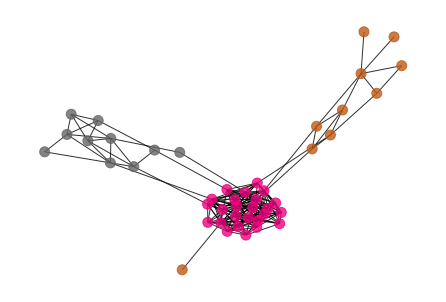

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
nx.draw(g,
        pos,
        node_size=100,
        alpha=0.8,
        node_color=[colors[community] for node, community in partition_true.items()],
        with_labels=False,
        ax=axes[0]
       )
axes[0].set_title('True')

nx.draw(g,
        pos,
        node_size=100,
        alpha=0.8,
        node_color=[colors[community] for node, community in partition_predicted.items()],
        with_labels=False,
        ax=axes[1]
       )
axes[1].set_title('Predicted')
plt.tight_layout()
plt.show()

Clearly there were some mistakes. How do we evaluate the quality of this clustering? Let's try using the Normalized Mutual Information Score

In [15]:
from sklearn.metrics import normalized_mutual_info_score

normalized_mutual_info_score(list(partition_true.values()), 
                             list(partition_predicted.values()))

0.7731472665151087

### Spectral Clustering

In [6]:
from sklearn.cluster import SpectralClustering

adj_mat = nx.to_numpy_matrix(g)
sc = SpectralClustering(3,
                        affinity='precomputed', #may want to change this to rbf
                        random_state=SEED)
sc.fit(np.asarray(adj_mat))
partition_predicted = {node: label for node, label in zip(list(g.nodes), sc.labels_)}

In [1]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
nx.draw(g,
        pos,
        node_size=100,
        alpha=0.8,
        node_color=[colors[community] for node, community in partition_true.items()],
        with_labels=False,
        ax=axes[0]
       )
axes[0].set_title('True')

nx.draw(g,
        pos,
        node_size=100,
        alpha=0.8,
        node_color=[colors[community] for node, community in partition_predicted.items()],
        with_labels=False,
        ax=axes[1]
       )
axes[1].set_title('Predicted')
plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined

In [8]:
normalized_mutual_info_score(list(partition_true.values()), 
                             list(partition_predicted.values()))

0.9154352829566526

Its much worse if we use rbf instead of precomputed.

**Takeaway**: Now we have a general idea of how to evaluate community detection methods. We will next move to deep learning based approaches.